# Advanced House Price Prediction

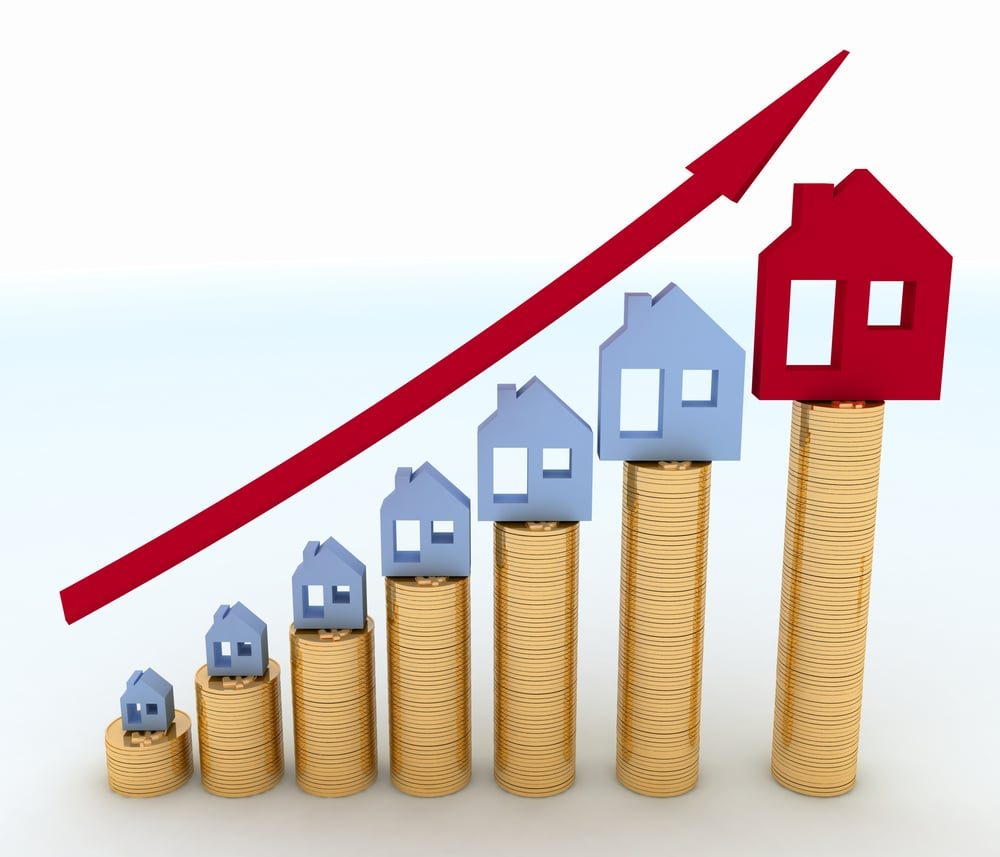

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("house_price_data.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.duplicated().sum()

df = df.drop_duplicates() if duplicates present

In [ ]:
df.isnull().sum()

In [ ]:
null_counts = df.isnull().sum()

In [ ]:
features_with_null = null_counts[null_counts > 0].index
print(features_with_null)

In [ ]:
null_counts = df[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']].isnull().sum()

In [ ]:
null_counts

In [ ]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [ ]:
numeric_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for feature in numeric_features:
    df[feature].fillna(df[feature].mean(), inplace = True)

categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                        'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond']
    


In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df = df.drop('Id', axis = 1)

In [ ]:
object_columns = df.select_dtypes(include = 'object').columns.tolist()
numerical_columns = df.select_dtypes(include = ['int', 'float']).columns.tolist()

# print('Object columns:', object_columns)
# print('\n')
# print('Numerical columns:', numerical_columns)

In [ ]:
df.nunique()

In [ ]:
for i in object_columns:
    print(i)
    print(df[i].unique())
    print('\n')

In [ ]:
for i in object_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

In [ ]:
for i in object_columns:
    print('countplot for: ', i)
    plt.figure(figsize=(15, 6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.xticks(rotation = -45)
    plt.show()
    print('\n')

In [ ]:
for i in object_columns:
    print('Pie plot for:', i)
    plt.figure(figsize=(20, 10))
    df[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.title('Distribution of ' + i)
    plt.ylabel('')
    plt.show()
    print('\n')

In [ ]:
for i in object_columns:
    fig = go.Figure(data = [go.Bar(x = df[i].value_counts().index, y = df[i].value_counts())])
    fig.update_layout(
    title = i,
    xaxis_title = i,
    yaxis_title = 'Count')
    fig.show()

In [ ]:
for i in object_columns:
    print('Pie plot for:', i)
    fig = px.pie(df, names = i, title = 'Distribution of '+i)
    fig.show()
    print('\n')

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

for discrete values: summation and   
for continuous values : integration



In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (15, 6))
    sns.boxplot(x = df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (15, 6))
    sns.violinplot(x = df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data = [go.Histogram(x = df[i], nbinsx = 20)])
    fig.update_layout(
        title = i,
        xaxis_title = i,
        yaxis_title = 'Count')
    fig.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data = [go.Box(x = df[i])])
    fig.update_layout(
        title = i,
        xaxis_title = i,
        yaxis_title = 'Value')
    fig.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data = [go.Violin(x = df[i])])
    fig.update_layout(
        title = i,
        xaxis_title = i,
        yaxis_title = 'Count')
    fig.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (10, 4))
    sns.scatterplot(x = df[i], y = df['SalePrice'], data = df, palette = 'hls')
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (10, 4))
    sns.lineplot(x = df[i], y = df['SalePrice'], data= df, palette = 'hls')
    plt.show()

In [ ]:
for j in object_columns:
    plt.figure(figsize = (10, 4))
    sns.barplot(x = df[j], y = df['SalePrice'], data = df, ci = None, palette = 'hls')
    plt.show()

In [ ]:
for j in object_columns:
    plt.figure(figsize = (15, 6))
    sns.scatterplot(x = df[j], y = df['SalePrice'], data = df, palette = 'hls')
    plt.show()

In [ ]:
for i in numerical_columns:
    if i!= 'SalesPrice':
        plt.figure(figsize=(15,6))
        sns.lineplot(x = df[i],y = df['SalePrice'],data = df,ci = None,palette ='hls')
        plt.show()

In [ ]:
df_numeric = df.select_dtypes(exclude=['object'])
corr = df_numeric.corr()
print(corr)

#correlation matrix

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot = True,cmap='coolwarm',fmt =".2f")
plt.title('Correlation plot')
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
plt.figure(figsize = (30, 20))
sns.histplot(df['SalePrice'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
#  ***NOTE: In Linear Regression target feature must be Normally Distributed
plt.figure(figsize=(15,6))
sns.histplot(df1['SalePrice'],kde = True,bins = 20,palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
#from plot we can observe the plot is left skewed so we must apply log and then it is normally distributed
df1['SalePrice'] = np.log(df1['SalePrice'])

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df1['SalePrice'],kde = True)
plt.xticks(rotation = 0)
plt.show()
#Below plot is normally distributed than previous plot

In [ ]:
numerical_columns

In [ ]:
numerical_columns=['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
skewness=df1[numerical_columns].skew()
skewed_columns = skewness[(skewness > 1) | (skewness < -1)]
print(skewed_columns)

In [ ]:
skew_features = skewed_columns.index.tolist()

In [ ]:
skew_features

In [ ]:
for feature in skew_features:
    df1[feature] = np.log1p(df1[feature])

In [ ]:
for feature in skew_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[feature], kde = True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [ ]:
df1

In [ ]:
df1 = pd.get_dummies(df1, columns = object_columns, drop_first = True)
df1

In [ ]:
corr1 = df1.corr()
corr1

In [ ]:
correlation_threshold = 0.5
good_features = corr1[corr1['SalePrice'].abs() > correlation_threshold]['SalePrice'].index.tolist()

In [ ]:
df3 = df1[good_features]
df3

In [ ]:
good_features.append('SalePrice')
good_features

In [ ]:
df2 = corr1[good_features]
df2

x = df1.drop(['SalePrice'], axis = 1)  
y = df1['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

y_pred =  regression_model.predict(X_test)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2_linear = r2_score(Y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Square Error: ', rmse)
print('r squared score:', r2_linear)

r squared score: 0.8528516831543822 # 85% of points lie on line

In [ ]:
x = df3.drop(['SalePrice'], axis = 1)
y = df3['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression_model = LinearRegression() 
regression_model.fit(X_train, Y_train)

In [ ]:
y_pred = regression_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2_linear = r2_score(Y_test, y_pred) 
print('Mean Squared Error:', mse)
print('Root Mean Square Error: ', rmse) 
print('r squared score:', r2_linear)

error = y_pred - y_actual
calc error for every point and sum them(mean error)->in this case error may be positive or negative 
so we square error and sum 
and divide by n (mse)
and sqrt it (rmse)
r2-score -> points that come on the regression line